# Independent Project: Data Science Core Week 9

# K-Nearest Neighbour Model (Titanic)

## Defining the Question 

The titanic was a British luxury passenger ship that sank on 14–15 April 1912 after hitting an iceberg during its maiden voyage. An estimated 1,500 passengers and ship personnel were killed in the accident. The passengers attempted to escape the sinking ship on lifeboats, with women and children being rescued first. The lifeboats did not have the capacity to take on all of the passengers, so the ship sank before many passengers were rescued. For this reason, many third class passengers, crew members and men were left behind.  
The sinking of the Titanic became one of the most famous modern tragedies in modern history, and has captured the mind of many scholars and scientists. (Encyclopedia Britannica)

The question for this analysis is as follows: Did passengers survive the Titanic disaster by chance, or were individuals with certain attributes more likely to survive?

The data provided is from the titanic records and was obtained from a popular Kaggle machine learning competition (https://www.kaggle.com/c/titanic).  
The data is relevant and sufficient to answer this question.

This project will be considered successful if the model can predict survival of a passenger with over 85% accuracy.

## Methodology

1. Data understanding
2. Data exploration
3. Data cleaning
4. Univariate and multivariate analysis
5. Building the model (K-Nearest Neighbour)
6. Evaluating the model

## Data Understanding

The data provided is as follows:

PassengerId - Identification number  
Survived - Whether the individual survived or not (0 = No, 1 = Yes)  
Pclass - Ticket class/economic status (1 = 1st/Upper, 2 = 2nd/Middle, 3 = 3rd/Lower)  
Name - Name  
Sex - Sex  
Age - Age in years (fractional if less than 1, xx.5 if estimated)  
SibSp - # of siblings / spouses aboard the Titanic  
Parch - # of parents / children aboard the Titanic (0 for children travelling only with a nanny)  
Ticket - Ticket number  
Fare - Passenger fare  
Cabin - Cabin number  
Embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)  

There are two csv files available for this analysis with test and train data.

## Data Exploration

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline
import seaborn as sns

In [2]:
# Loading the test data
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The test set does not have a classifier for whether the individual survived, so we can not use it for creating a model.

In [3]:
# Loading the train data
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Checking the shape of the data
df_train.shape

(891, 12)

In [5]:
# Checking the data types and missing records
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The dataset has 12 features (5 string and 7 numerical) and 891 records. 
All columns appear to have the correct data type.
There are some missing values in the dataset.

In [6]:
# Previewing the variable distributions
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The data appears to have a reasonable range, but some variables seem to be unevenly distributed.

## Data Cleaning

In [7]:
# Checking for duplicated records
df_train.duplicated().sum()

0

In [8]:
# Checking for null values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Checking the effect of dropping all null values on the structure of the data
df_train.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    183 non-null int64
Survived       183 non-null int64
Pclass         183 non-null int64
Name           183 non-null object
Sex            183 non-null object
Age            183 non-null float64
SibSp          183 non-null int64
Parch          183 non-null int64
Ticket         183 non-null object
Fare           183 non-null float64
Cabin          183 non-null object
Embarked       183 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


Dropping all null values deletes too many records. 
The cabin column does not have data for most records, and hence it may be best to drop this variable.

In [10]:
# Dropping the cabin column
df = df_train.drop(columns = 'Cabin')
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

The null values for the embarked variable can be dropped since there are only 2 missing records in that column

In [11]:
# Dropping null values from Embarked variable
df = df.dropna(subset = ['Embarked'])

In [12]:
# Checking that the null values were deleted
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

The age variable has many missing values, so it may not be best to drop them.
Before imputing with a median/mean value, it is important to check whether the data is missing completely at random.

In [13]:
# Creating pivot tables to check if data is missing at random
print(df[df['Age'].notnull()].groupby('Pclass')[['Age']].mean())
print(df[df['Age'].notnull()].groupby('Survived')[['Age']].mean())
print(df[df['Age'].notnull()].groupby('Sex')[['Age']].mean())
print(df[df['Age'].notnull()].groupby('SibSp')[['Age']].mean())
print(df[df['Age'].notnull()].groupby('Parch')[['Age']].mean())

              Age
Pclass           
1       38.105543
2       29.877630
3       25.140620
                Age
Survived           
0         30.626179
1         28.193299
              Age
Sex              
female  27.745174
male    30.726645
             Age
SibSp           
0      31.318230
1      30.089727
2      22.620000
3      13.916667
4       7.055556
5      10.200000
             Age
Parch           
0      32.109827
1      24.422000
2      17.216912
3      33.200000
4      44.500000
5      39.200000
6      43.000000


The data does not seem to be evenly distributed across class, number of siblings/spouses, and number of parents/children. Since the class column does not separate younger people very well, the age daa can be imputed by number of siblings/spouses according to the mean values above.

In [14]:
# Checking the values for number of siblings/spouses on board
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

From the pivot table, age data does not appear to be available for passengers with 8 siblings/spouses. 

In [15]:
# Confirming that all data for individuals with 8 siblings/spouses on board has missing age data
df[df['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,S


The age imputed into these records will be the mean age for the entire dataset.

In [16]:
# Calculating the mean to impute
df['Age'].mean()

29.64209269662921

In [17]:
# Imputing age values by number of siblings/spouses aboard the ship
def age_approx(cols):
    Age = cols[0]
    SibSp = cols[1]
    
    if pd.isnull(Age):
        if SibSp == 0:
            return 31
        elif SibSp == 1:
            return 30
        elif SibSp == 2:
            return 22
        elif SibSp == 3:
            return 14
        elif SibSp == 4:
            return 7
        elif SibSp == 5:
            return 10
        else:
            return 30
    else:
        return Age
  
df['Age'] = df[['Age', 'SibSp']].apply(age_approx, axis=1)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
print(df[df['Age'].notnull()].groupby('Pclass')[['Age']].mean())
print(df[df['Age'].notnull()].groupby('Survived')[['Age']].mean())
print(df[df['Age'].notnull()].groupby('Sex')[['Age']].mean())
print(df[df['Age'].notnull()].groupby('SibSp')[['Age']].mean())
print(df[df['Age'].notnull()].groupby('Parch')[['Age']].mean())

              Age
Pclass           
1       37.081402
2       29.944728
3       26.515112
                Age
Survived           
0         30.538251
1         28.525500
              Age
Sex              
female  28.044872
male    30.700468
             Age
SibSp           
0      31.246287
1      30.078565
2      22.553571
3      13.937500
4       7.055556
5      10.200000
8      30.000000
             Age
Parch           
0      31.781065
1      24.266271
2      19.171875
3      33.200000
4      44.500000
5      39.200000
6      43.000000


The new distribution is fairly similar to the age distribution before imputing data.
Now outliers can be identified and dealt with, if needed.

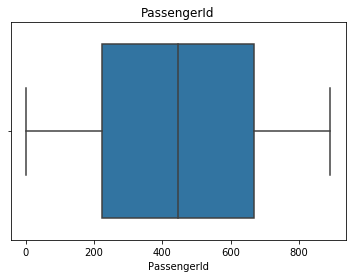

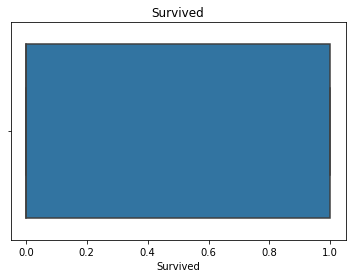

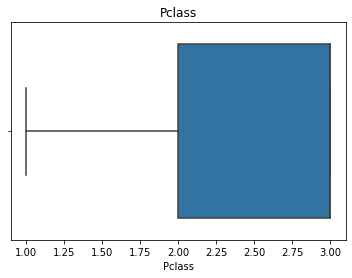

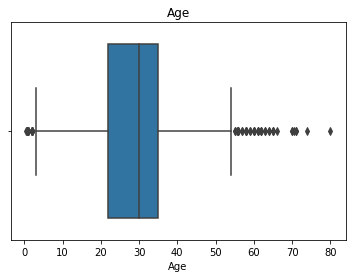

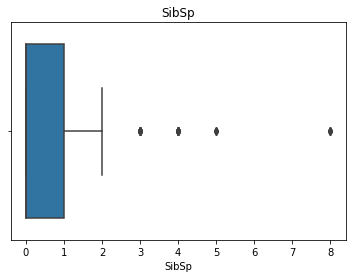

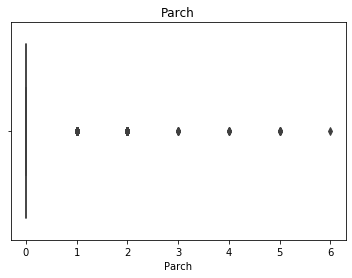

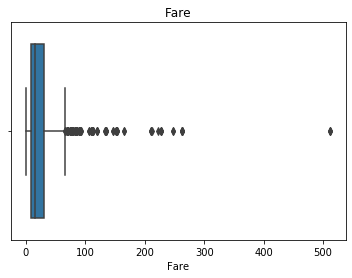

In [19]:
# Checking for outliers
num_cols = df.select_dtypes(include = 'number')

for col in num_cols:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(col)

The data has outliers and hence will need to be scaled or normalized for modeling.

##  Univariate Summaries

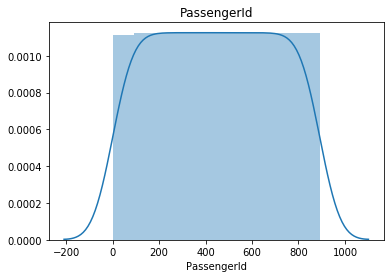

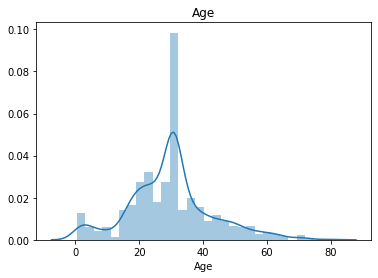

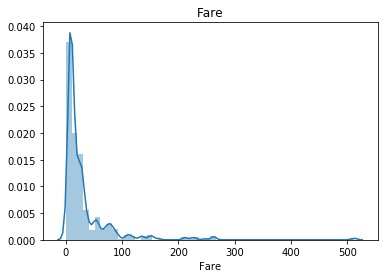

In [20]:
# Plotting histograms for continuous numerical variables
num_cols = ['PassengerId', 'Age', 'Fare']

for col in num_cols:
    plt.figure()
    sns.distplot(df[col])
    plt.title(col)

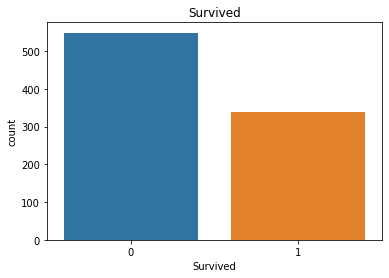

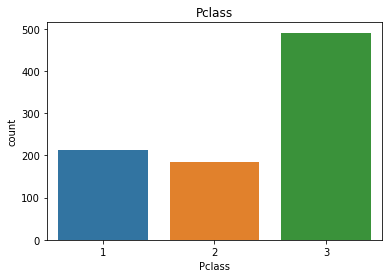

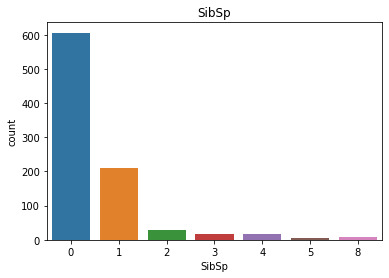

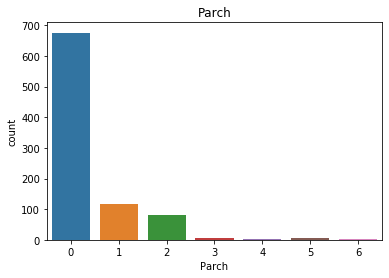

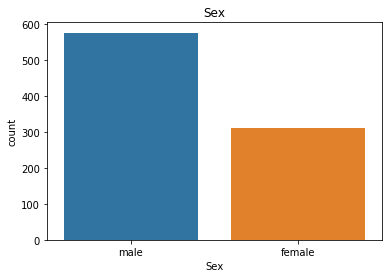

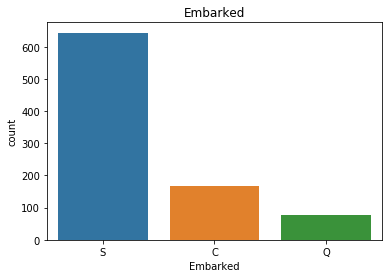

In [21]:
# Plotting countplots for categorical variables
cat_cols = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked']

for col in cat_cols:
    plt.figure()
    sns.countplot(df[col])
    plt.title(col)

## Multivariate analysis

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


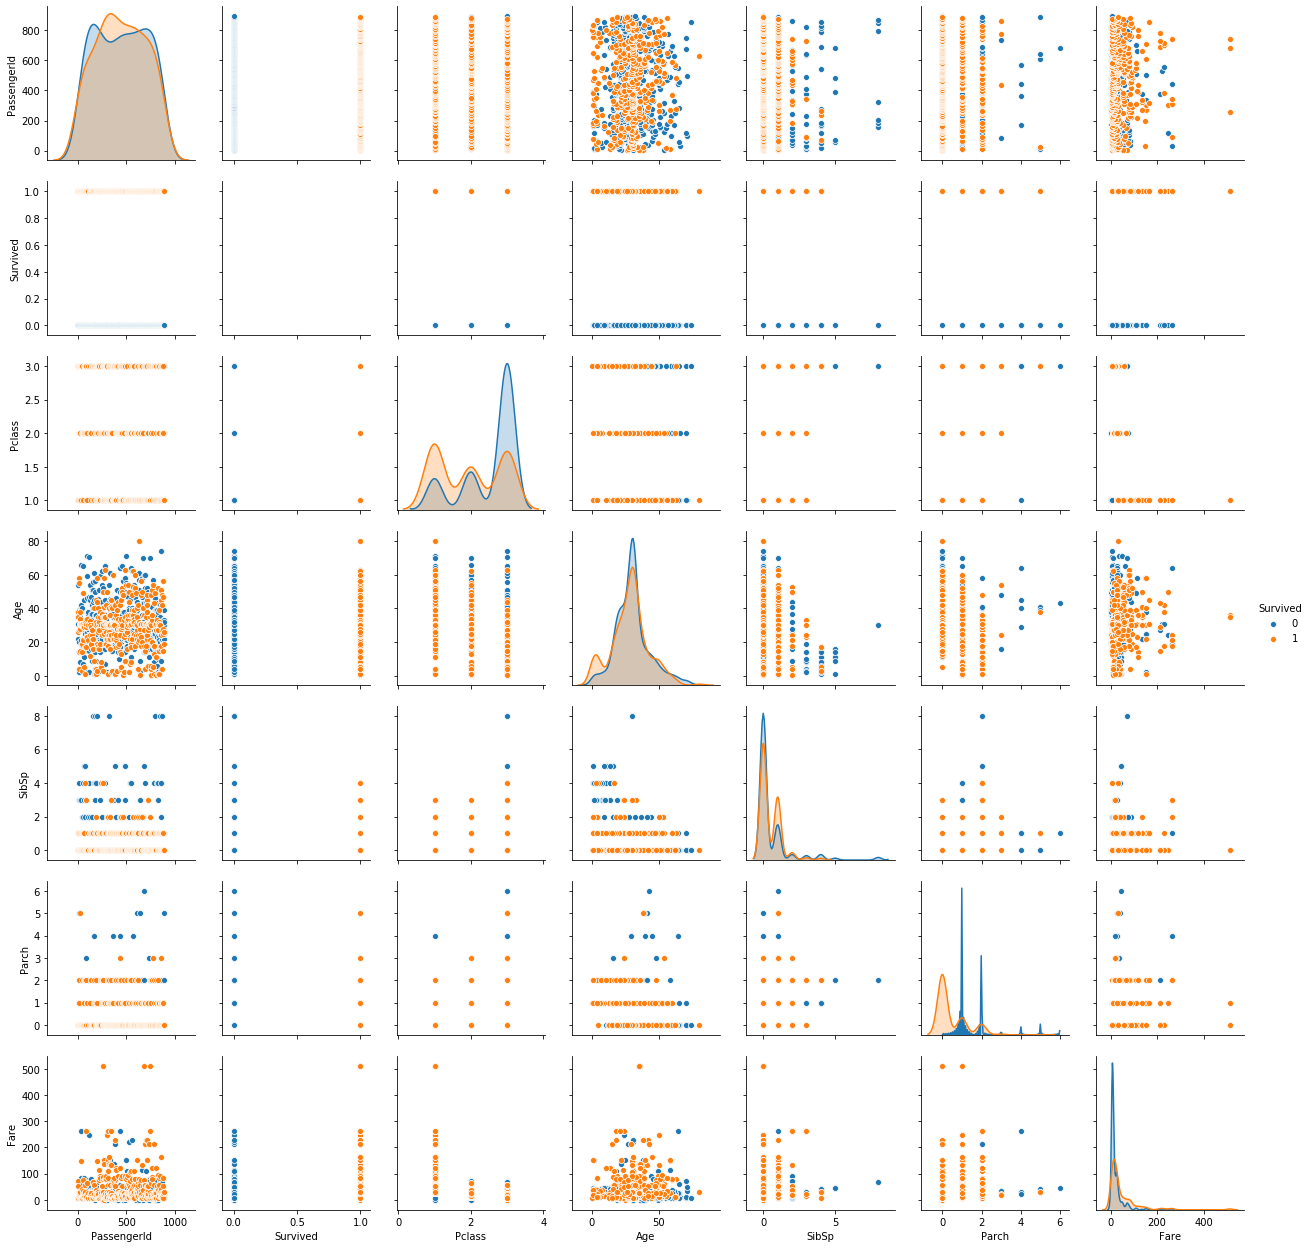

In [22]:
# Plotting histograms to check the distribution of survivors for each variable
sns.pairplot(df, hue = 'Survived')

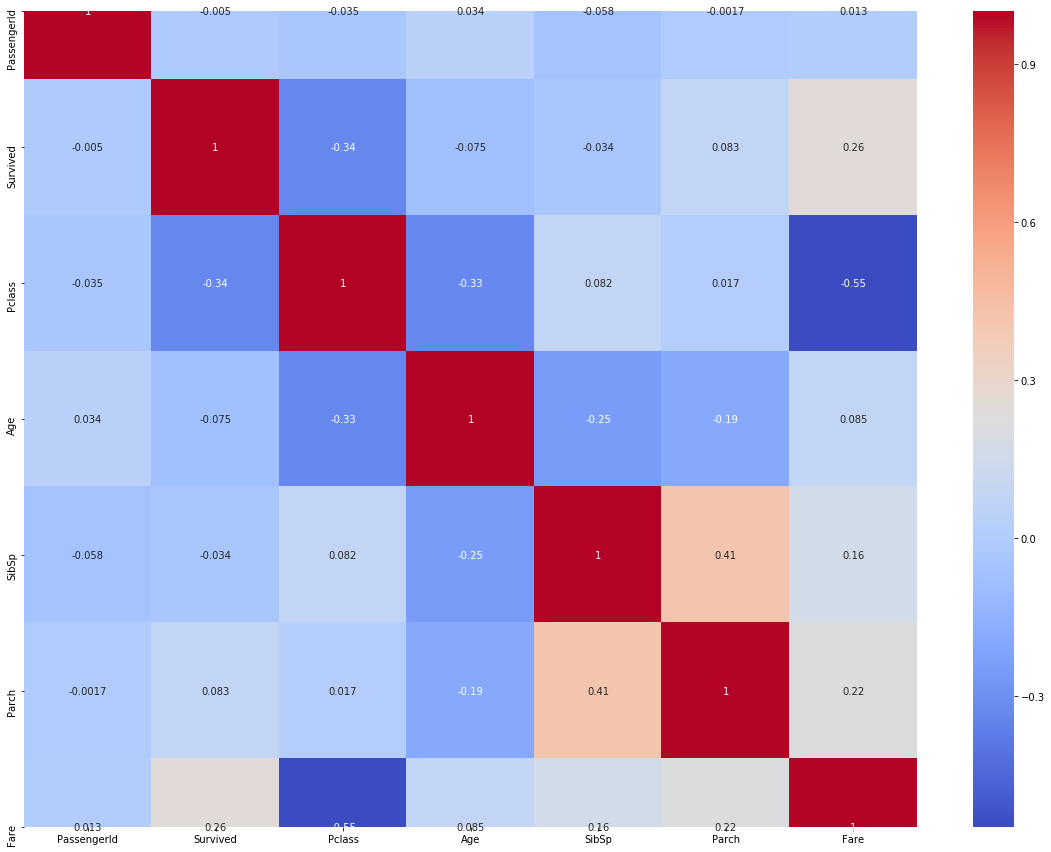

In [23]:
# Checking for correlation between variables
corr = df.corr()

f, ax = plt.subplots(figsize=(20, 15))
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Model - K-Nearest Neighbour

The sex column has text data which needs to be converted to categorical data and encoded.

In [24]:
# Encoding data in categorical columns
df['Sex'] = df['Sex'].astype('category')

# Using label encoder on categorical columns
df['Sex'] = df['Sex'].cat.codes
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int8

In [25]:
#Checking the distribution of passengers that survived vs those that did not survive
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

The data is imbalanced, so the predictions that the model gives may be more accurate for passengers that did not survive.
We will create a new balanced dataset by resampling with replacement for passengers that survived, until the number of records for each class are even.

In [26]:
# Separate majority and minority classes
from sklearn.utils import resample

df_majority = df[df.Survived==0]
df_minority = df[df.Survived==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,  
                                 n_samples=549,    # no of passengers that did not survive
                                 random_state=0) 
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [44]:
#Checking the distribution of passengers that survived vs those that did not survive
df_upsampled['Survived'].value_counts()

1    549
0    549
Name: Survived, dtype: int64

Now the classes are even.  
The data on passenger ID, name and point of embarkation are not relevant for this analysis, so they will not be included in the model. 

In [58]:
# Splitting the dataset into 80% train and 20% test data
X = df_upsampled[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare']].values
y = df_upsampled['Survived'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('X train:', X_train.shape, 'X test:', X_test.shape, 'y train:', y_train.shape, 'y test:', y_test.shape)

# Feature scaling (standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Training the KNN model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6)
classifier.fit(X_train, y_train)

# Making predictions based on the model
y_pred = classifier.predict(X_test)

# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

X train: (878, 6) X test: (220, 6) y train: (878,) y test: (220,)
[[91 14]
 [20 95]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.87      0.83      0.85       115

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220



After trying multiple values, the ideal number of neighbours(k) for this model was found to be 6.

In [47]:
# Splitting the dataset into 70% train and 30% test data
X = df_upsampled[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare']].values
y = df_upsampled['Survived'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print('X train:', X_train.shape, 'X test:', X_test.shape, 'y train:', y_train.shape, 'y test:', y_test.shape)

# Feature scaling (standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Training the KNN model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6)
classifier.fit(X_train, y_train)

# Making predictions based on the model
y_pred = classifier.predict(X_test)

# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

X train: (768, 6) X test: (330, 6) y train: (768,) y test: (330,)
[[137  16]
 [ 41 136]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       153
           1       0.89      0.77      0.83       177

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.84      0.83      0.83       330



In [48]:
# Splitting the dataset into 60% train and 40% test data
X = df_upsampled[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare']].values
y = df_upsampled['Survived'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

print('X train:', X_train.shape, 'X test:', X_test.shape, 'y train:', y_train.shape, 'y test:', y_test.shape)

# Feature scaling (standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Training the KNN model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6)
classifier.fit(X_train, y_train)

# Making predictions based on the model
y_pred = classifier.predict(X_test)

# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

X train: (658, 6) X test: (440, 6) y train: (658,) y test: (440,)
[[185  33]
 [ 52 170]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       218
           1       0.84      0.77      0.80       222

    accuracy                           0.81       440
   macro avg       0.81      0.81      0.81       440
weighted avg       0.81      0.81      0.81       440



An 80/20 split of the model gives the best accuracy with test data. To optimize the model, we will use 80% train data and apply a dimensionality reduction technique, change the distance metric, implement weighted voting, and changing the algorithm used to compute the nearest neighbours.

## LDA for dimensionality reduction

In [136]:
# Splitting the dataset into 80% train and 20% test data
X = df_upsampled[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare']].values
y = df_upsampled['Survived'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('X train:', X_train.shape, 'X test:', X_test.shape, 'y train:', y_train.shape, 'y test:', y_test.shape)

# Feature scaling (standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Training the KNN model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 50)
classifier.fit(X_train, y_train)

# Making predictions based on the model
y_pred = classifier.predict(X_test)

# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

X train: (878, 6) X test: (220, 6) y train: (878,) y test: (220,)
[[92 13]
 [20 95]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.88      0.83      0.85       115

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220



Dimensionality reduction improves the accuracy of prediction slightly at k = 50.

## Changing the distance metric

In [141]:
# Splitting the dataset into 80% train and 20% test data
X = df_upsampled[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare']].values
y = df_upsampled['Survived'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('X train:', X_train.shape, 'X test:', X_test.shape, 'y train:', y_train.shape, 'y test:', y_test.shape)

# Feature scaling (standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Training the KNN model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'manhattan')
classifier.fit(X_train, y_train)

# Making predictions based on the model
y_pred = classifier.predict(X_test)

# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

X train: (878, 6) X test: (220, 6) y train: (878,) y test: (220,)
[[92 13]
 [19 96]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.88      0.83      0.86       115

    accuracy                           0.85       220
   macro avg       0.85      0.86      0.85       220
weighted avg       0.86      0.85      0.85       220



The accuracy of prediction improved using the Manhattan distance. Since the accuracy of prediction has improved while keeping k at 6, we will use the Manhatann distance as a parameter and discard LDA.

## Weighted voting

In [100]:
# Splitting the dataset into 80% train and 20% test data
X = df_upsampled[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare']].values
y = df_upsampled['Survived'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('X train:', X_train.shape, 'X test:', X_test.shape, 'y train:', y_train.shape, 'y test:', y_test.shape)

# Feature scaling (standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Training the KNN model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'manhattan', weights = 'distance')
classifier.fit(X_train, y_train)

# Making predictions based on the model
y_pred = classifier.predict(X_test)

# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

X train: (878, 6) X test: (220, 6) y train: (878,) y test: (220,)
[[ 86  19]
 [ 12 103]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       105
           1       0.84      0.90      0.87       115

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.86      0.86      0.86       220



Using the distance weight function with 9 neighbours gives a better prediction.

## Changing the algorithm

In [160]:
# Splitting the dataset into 80% train and 20% test data
X = df_upsampled[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare']].values
y = df_upsampled['Survived'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('X train:', X_train.shape, 'X test:', X_test.shape, 'y train:', y_train.shape, 'y test:', y_test.shape)

# Feature scaling (standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Training the KNN model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'manhattan', weights = 'distance', algorithm = 'auto')
classifier.fit(X_train, y_train)

# Making predictions based on the model
y_pred = classifier.predict(X_test)

# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

X train: (878, 6) X test: (220, 6) y train: (878,) y test: (220,)
[[ 83  22]
 [ 15 100]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       105
           1       0.82      0.87      0.84       115

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220



None of the algorithm changes had an effect on the accuracy of prediction.

From the parameter tuning performed above, the best model uses 20% test data, with 9 nearest neighbours, using the Manhattan distance and weighted by distance. The most accurate predictions on whether a passenger would survive or not can be made using the following model:

In [184]:
# Separate majority and minority classes
from sklearn.utils import resample

df_majority = df[df.Survived==0]
df_minority = df[df.Survived==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,  
                                 n_samples=549,    # no of passengers that did not survive
                                 random_state=0) 
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Splitting the dataset into 80% train and 20% test data
X = df_upsampled[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare']].values
y = df_upsampled['Survived'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('X train:', X_train.shape, 'X test:', X_test.shape, 'y train:', y_train.shape, 'y test:', y_test.shape)

# Feature scaling (standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Training the KNN model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'manhattan', weights = 'distance')
classifier.fit(X_train, y_train)

# Making predictions based on the model
y_pred = classifier.predict(X_test)

# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

X train: (878, 6) X test: (220, 6) y train: (878,) y test: (220,)
[[ 86  19]
 [ 12 103]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       105
           1       0.84      0.90      0.87       115

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.86      0.86      0.86       220



## Evaluation of the analysis

The model has an overall prediction accuracy of 86%, and hence this analysis can be considered a success.

The data was sufficient for this analysis.  
However, there was a lot of missing data for age, and imputation of values may have increased the error in prediction.  
The data was also not balanced, so a more balanced dataset or one with more records would give a better result, if that was possible.